<a href="https://colab.research.google.com/github/oubouza/dataset/blob/main/Detailed_Analysis_on_campus_recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importer les librairies

In [101]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
import sklearn
import os
%matplotlib inline
import matplotlib as mpl
import sklearn.linear_model
import urllib.request
from sklearn import preprocessing
from sklearn import pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

In [102]:
import urllib.request
Data_path = os.path.join("Dataset", "/Detailed-Analysis-on-campus-recruitment.csv")
download_path = "https://raw.githubusercontent.com/oubouza/projetML/main/Detailed-Analysis-on-campus-recruitment.csv"
os.makedirs("Dataset", exist_ok=True)
urllib.request.urlretrieve(download_path, Data_path)
Data=pd.read_csv(Data_path, thousands=',')

In [103]:
#voir les valeurs non-null
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   22        214 non-null    int64  
 1   1         214 non-null    int64  
 2   M         214 non-null    object 
 3   67.0      214 non-null    float64
 4   Others    214 non-null    object 
 5   91.0      214 non-null    float64
 6   Others.1  214 non-null    object 
 7   Commerce  214 non-null    object 
 8   58.0      214 non-null    float64
 9   SciTech   214 non-null    object 
 10  No        214 non-null    object 
 11  55.0      214 non-null    float64
 12  MktHR     214 non-null    object 
 13  58.8      214 non-null    float64
 14  Placed    214 non-null    object 
 15  270000.0  214 non-null    object 
dtypes: float64(5), int64(2), object(9)
memory usage: 26.9+ KB


In [104]:
Data

,22,1,M,67.0,Others,91.0,Others.1,Commerce,58.0,SciTech,No,55.0,MktHR,58.8,Placed,270000.0
0,23,2,M,79.33,Central,78.33,Others,Science,77.48,SciTech,Yes,86.5,MktFin,66.28,Placed,200000.0
1,24,3,M,65.00,Central,68.00,Central,Arts,64.00,CommMgmt,No,75.0,MktFin,57.80,Placed,250000.0
2,25,4,M,56.00,Central,52.00,Central,Science,52.00,SciTech,No,66.0,MktHR,59.43,Not Placed,?
3,26,5,M,85.80,Central,73.60,Central,Commerce,73.30,CommMgmt,No,96.8,MktFin,55.50,Placed,425000.0
4,27,6,M,55.00,Others,49.80,Others,Science,67.25,SciTech,Yes,55.0,MktFin,51.58,Not Placed,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,232,211,M,80.60,Others,82.00,Others,Commerce,77.60,CommMgmt,No,91.0,MktFin,74.49,Placed,400000.0
210,233,212,M,58.00,Others,60.00,Others,Science,72.00,SciTech,No,74.0,MktFin,53.62,Placed,275000.0
211,234,213,M,67.00,Others,67.00,Others,Commerce,73.00,CommMgmt,Yes,59.0,MktFin,69.72,Placed,295000.0
212,235,214,F,74.00,Others,66.00,Others,Commerce,58.00,CommMgmt,No,70.0,MktHR,60.23,Placed,204000.0


In [105]:
#renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(Data.dtypes):
  if c==object:
    cat_data.append(Data.iloc[:,i])
  else:
    num_data.append(Data.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [106]:
#Pour les variables catégoriques on va remplacer les valeurs manquantes par les valeurs qui se répètent de plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [107]:
Data.isnull().sum()

22          0
1           0
M           0
67.0        0
Others      0
91.0        0
Others.1    0
Commerce    0
58.0        0
SciTech     0
No          0
55.0        0
MktHR       0
58.8        0
Placed      0
270000.0    0
dtype: int64

In [108]:
#afficher que des valeurs numériques
Data.describe()

,22,1,67.0,91.0,58.0,55.0,58.8
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,129.500000,108.500000,67.304813,66.217897,66.409299,72.180467,62.294439
std,61.920648,61.920648,10.852572,10.790890,7.353562,13.255156,5.842180
min,23.000000,2.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,76.250000,55.250000,60.500000,60.850000,61.000000,60.000000,57.922500
50%,129.500000,108.500000,67.000000,65.000000,66.000000,71.000000,62.070000
75%,182.750000,161.750000,75.850000,73.000000,72.000000,83.750000,66.267500
max,236.000000,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


<Axes: >

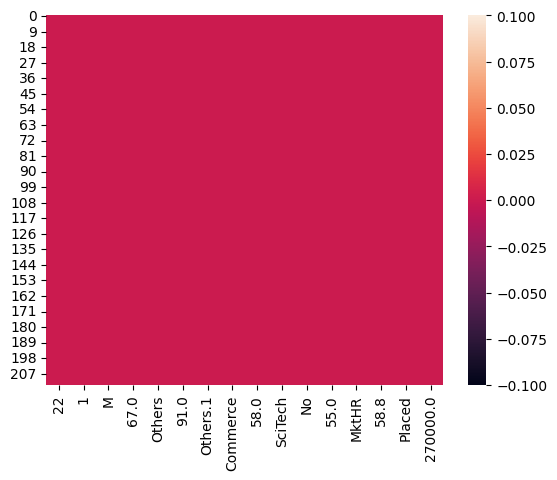

In [109]:
sns.heatmap(Data.isnull())

In [110]:
Data.duplicated().sum()

0

Analysis


In [111]:
Data['270000.0'].value_counts()

?           67
300000.0    22
250000.0    18
240000.0    15
260000.0     7
200000.0     6
265000.0     6
360000.0     6
220000.0     5
275000.0     5
210000.0     4
400000.0     4
350000.0     3
216000.0     3
500000.0     3
270000.0     3
204000.0     2
230000.0     2
276000.0     2
280000.0     2
236000.0     2
218000.0     2
252000.0     2
690000.0     1
233000.0     1
340000.0     1
285000.0     1
290000.0     1
225000.0     1
650000.0     1
264000.0     1
940000.0     1
255000.0     1
268000.0     1
380000.0     1
420000.0     1
336000.0     1
450000.0     1
287000.0     1
411000.0     1
320000.0     1
278000.0     1
393000.0     1
231000.0     1
425000.0     1
295000.0     1
Name: 270000.0, dtype: int64

array([[<Axes: title={'center': '22'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '67.0'}>],
       [<Axes: title={'center': '91.0'}>,
        <Axes: title={'center': '58.0'}>,
        <Axes: title={'center': '55.0'}>],
       [<Axes: title={'center': '58.8'}>, <Axes: >, <Axes: >]],
      dtype=object)

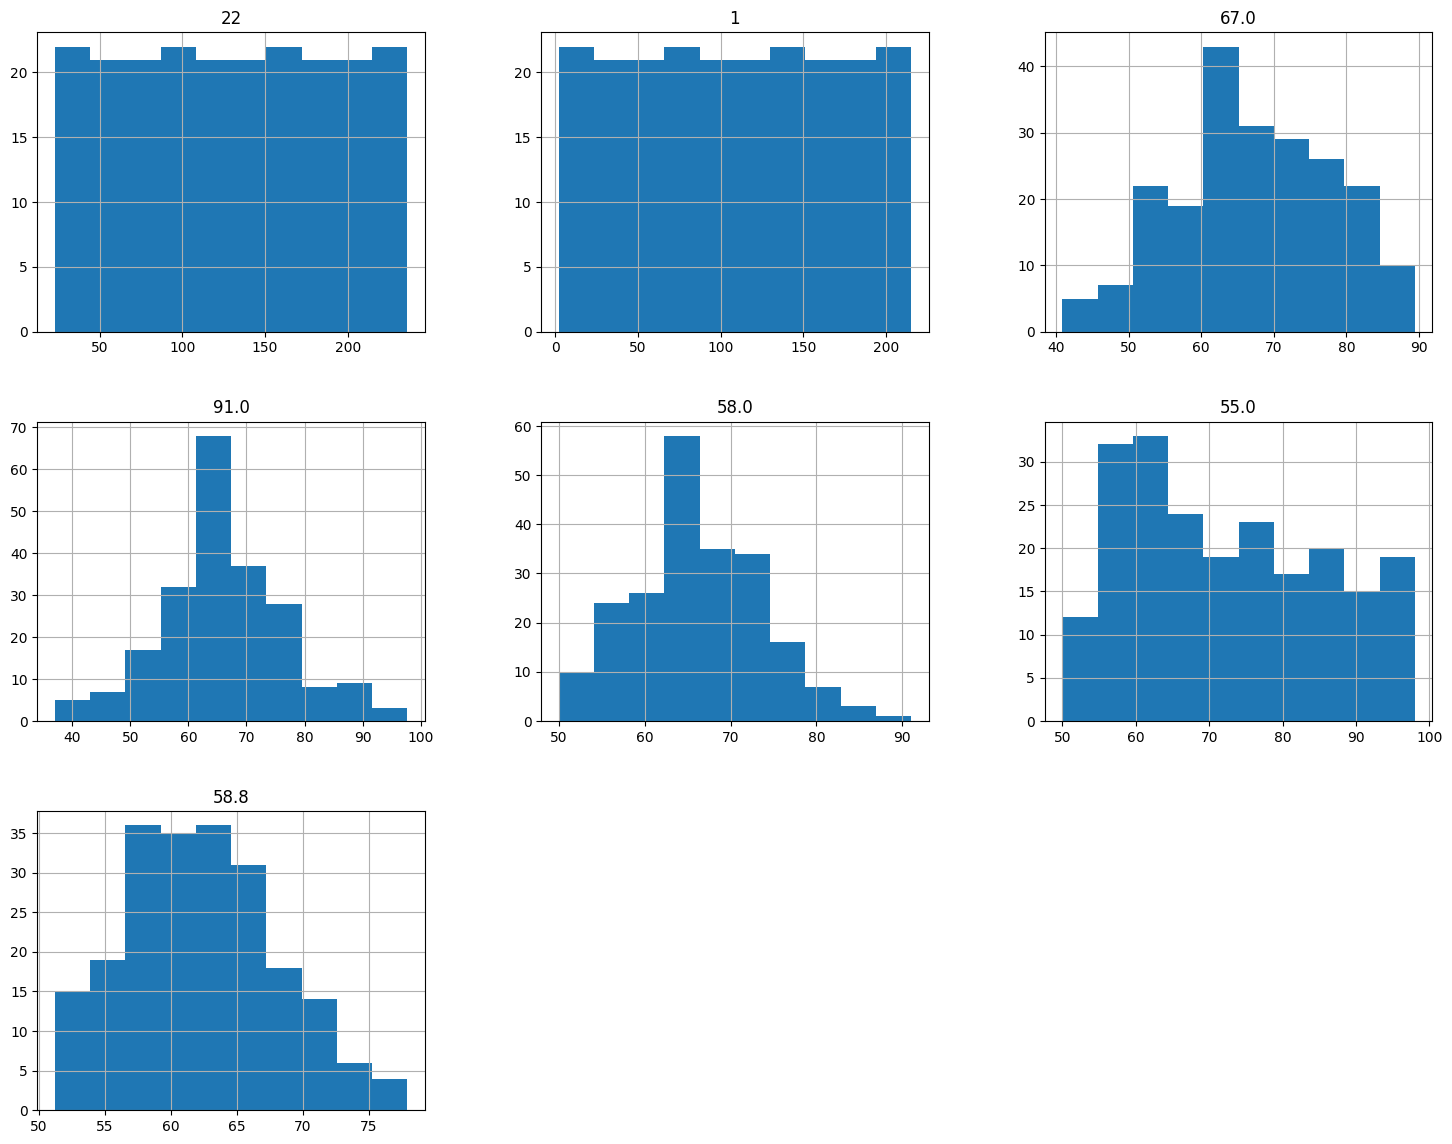

In [112]:
Data.hist(figsize=(18,14))

In [113]:
cor=Data.corr()

<ipython-input-113-8b0aad432088>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=Data.corr()


<Axes: >

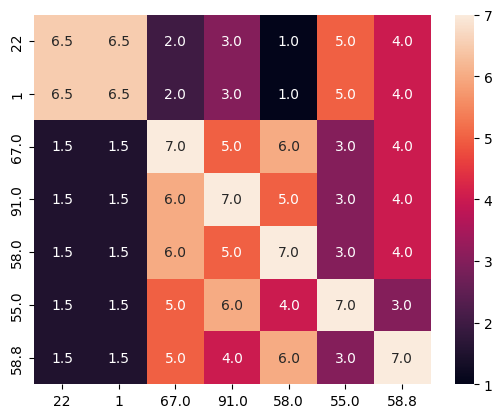

In [114]:
sns.heatmap(cor.rank(axis='columns'),annot=True,fmt='.1f')

Processing Data


In [115]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()

In [116]:
obj=Data.select_dtypes(include='object')
non_obj=Data.select_dtypes(exclude='object')

In [117]:
for i in range(0,obj.shape[1]):
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])

<ipython-input-117-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])
<ipython-input-117-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  obj.iloc[:,i]=lab.fit_transform(obj.iloc[:,i])
<ipython-input-117-015437255f5d>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.ise

Linear Regression

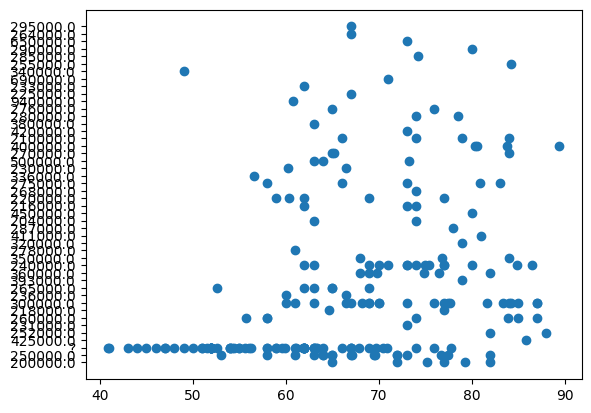

In [118]:
# afficher nuage de points
plt.scatter(Data['67.0'],Data['270000.0'])

In [125]:
# exclure les donnees dont 67.0 supérieur à 27000
Data=Data[Data['67.0']<=27000]

In [131]:
X=Data.iloc[:,:-1].values
y=Data.iloc[:,:-1].values
print(X)
print(y)

[[23 2 'M' ... 'MktFin' 66.28 'Placed']
 [24 3 'M' ... 'MktFin' 57.8 'Placed']
 [25 4 'M' ... 'MktHR' 59.43 'Not Placed']
 ...
 [234 213 'M' ... 'MktFin' 69.72 'Placed']
 [235 214 'F' ... 'MktHR' 60.23 'Placed']
 [236 215 'M' ... 'MktHR' 60.22 'Not Placed']]
[[23 2 'M' ... 'MktFin' 66.28 'Placed']
 [24 3 'M' ... 'MktFin' 57.8 'Placed']
 [25 4 'M' ... 'MktHR' 59.43 'Not Placed']
 ...
 [234 213 'M' ... 'MktFin' 69.72 'Placed']
 [235 214 'F' ... 'MktHR' 60.23 'Placed']
 [236 215 'M' ... 'MktHR' 60.22 'Not Placed']]


In [124]:
# Check the column names in your DataFrame
print("Column names:", Data.columns)


Column names: Index(['22', '1', 'M', '67.0', 'Others', '91.0', 'Others.1', 'Commerce',
       '58.0', 'SciTech', 'No', '55.0', 'MktHR', '58.8', 'Placed', '270000.0'],
      dtype='object')


In [126]:
# Assuming 'target_column' is the correct column name you want to predict
target_column = 'target_column'

In [127]:
len(X)

214

In [ ]:
# Set plot labels and title
plt.xlabel('67.0')
plt.ylabel('Others')
plt.title('Count of 58.0 in the Dataset')

In [ ]:
sns.countplot(data=Data,x='Others', color='green')

In [ ]:
sns.countplot(data=Data,x='Commerce',hue='Others')

Diviser la base de données en une base de données test et d'entrainement

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

création d'un modèle de régression linéaire

In [ ]:
# Generate some example data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 5 * X + np.random.randn(100, 1)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression()

In [ ]:
# Fit the model on the training data
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

In [ ]:
# Plot the regression line
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()